In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
with open('Word2Vec_X_data_colitis.pkl', 'rb') as f:
    X_data = pickle.load(f)
with open('Word2Vec_y_data_colitis.pkl', 'rb') as f:
    y_data = pickle.load(f)
with open('Word2Vec_embedding_matrix_colitis.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)
with open('Word2Vec_X_data_colitis_average.pkl', 'rb') as f:
    X_data_embedded = pickle.load(f)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_data_embedded, y_data, test_size=0.2)

In [4]:
list(y_train).count(1)

61

In [137]:
def smart_sample(X_train, y_train, num_positive, num_negative):
    X_train_positives = np.asarray([X_train[i] for i in range(X_train.shape[0]) if y_train[i] == 1])
    y_train_positives = np.asarray([y_train[i] for i in range(y_train.shape[0]) if y_train[i] == 1])
    X_train_negatives = np.asarray([X_train[i] for i in range(X_train.shape[0]) if y_train[i] == 0])
    y_train_negatives = np.asarray([y_train[i] for i in range(y_train.shape[0]) if y_train[i] == 0])
    
    percent_positive = num_positive/X_train_positives.shape[0]
    percent_negative = num_negative/X_train_negatives.shape[0]
    
    mask_positive = np.random.choice([False, True], len(X_train_positives), p=[1-percent_positive, percent_positive])
    mask_negative = np.random.choice([False, True], len(X_train_negatives), p=[1-percent_negative, percent_negative])
    
    X_train_positives_sampled = X_train_positives[mask_positive]
    y_train_positives_sampled = y_train_positives[mask_positive]
    X_train_negatives_sampled = X_train_negatives[mask_negative]
    y_train_negatives_sampled = y_train_negatives[mask_negative]
    
    X_data_smart_sampled = np.concatenate((X_train_positives_sampled, X_train_negatives_sampled), axis=0)
    y_data_smart_sampled = np.concatenate((y_train_positives_sampled, y_train_negatives_sampled), axis=0)
    
    data_sampled = np.column_stack( (X_data_smart_sampled, y_data_smart_sampled) )
    np.random.shuffle(data_sampled)
    X_train_sampled, y_train_sampled = data_sampled[:, 0 : data_sampled.shape[1]-1], data_sampled[:, data_sampled.shape[1]-1].ravel()

    return X_train_sampled, y_train_sampled

X_train_sampled, y_train_sampled = smart_sample(X_train, y_train, 61, 71)   

In [138]:
clf = SVC(kernel='linear') 

In [139]:
clf.fit(X_train_sampled, y_train_sampled) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [140]:
y_pred = clf.predict(X_test)

In [141]:
y_pred.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [142]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [148]:
accuracy_score(y_test, y_pred)

0.9358974358974359

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       138
           1       0.72      0.72      0.72        18

   micro avg       0.94      0.94      0.94       156
   macro avg       0.84      0.84      0.84       156
weighted avg       0.94      0.94      0.94       156



In [145]:
print(confusion_matrix(y_test, y_pred))

[[133   5]
 [  5  13]]


In [146]:
def show_confusion_matrix(confusion_matrix):
    SMALL_SIZE = 14
    MEDIUM_SIZE = 17
    BIGGER_SIZE = 50

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    ax = plt.subplot()
    confusion_matrix = normalize(confusion_matrix, axis=1, norm='l1')
    sns.heatmap(confusion_matrix ,annot=True, ax = ax, cmap='Reds')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix', fontsize=23)
    ax.xaxis.set_ticklabels(['Normal', 'Colitis'])
    ax.yaxis.set_ticklabels(['Normal', 'Colitis'], va='center')
    #plt.matshow(confusion_matrix_array)
    #plt.colorbar()
    plt.show()

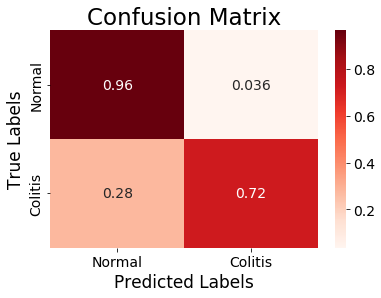

In [147]:
show_confusion_matrix(confusion_matrix(y_test, y_pred))